## Data Science for Social Impact 

##### 2nd assigment 

##### Author: Avigail Vantu av1155@nyu.edu   
##### Ocotober 2017 

This Jupyter Notebook is written in Python and will follow you through the steps to read csv files, merge two datasets, visualize, describe the data and apply in columns. 


In [37]:
import glob
import os
import json
import pandas as pd
#import geopandas as gpd

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


prep, let's reading both csv files and eyeball both through the notebook to get a sense of how the data looks like 
Di is the district level dataset, school is the school level dataset

In [3]:

dis = pd.read_csv("DistrictsLevelData.csv")
school = pd.read_csv("SchoolLevelData.csv")


/Users/avigailvantu/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
#district head
dis.head(2)

,Agency Name,State Name [District] Latest available year,State Abbr [District] Latest available year,Agency ID - NCES Assigned [District] Latest available year,Total Number Operational Schools [Public School] 2013-14,Total Number Operational Charter Schools [Public School] 2013-14,Total Number of Public Schools [Public School] 2013-14,Agency Type [District] 2013-14,Urban-centric Locale [District] 2013-14,Metro Micro Area Code [District] 2013-14,...,White Students [Public School] 2013-14,Hawaiian Nat./Pacific Isl. Students [Public School] 2013-14,Two or More Races Students [Public School] 2013-14,Full-Time Equivalent (FTE) Teachers [District] 2013-14,Full-Time Equivalent (FTE) Teachers [Public School] 2013-14,Pupil/Teacher Ratio [District] 2013-14,Pupil/Teacher Ratio [Public School] 2013-14,Kindergarten Teachers [District] 2013-14,Elementary Teachers [District] 2013-14,agency_id
0,100 LEGACY ACADEMY CHARTER SCHOOL,New Jersey,NJ,3400743,0,0.0,NaN,7-Charter school agency,11-City: Large,1-Metropolitan Area,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3400743
1,21ST CENTURY CHARTER SCH OF GARY,Indiana,IN,1800046,1,1.0,1.0,7-Charter school agency,13-City: Small,1-Metropolitan Area,...,0.0,0.0,9.0,1.0,1.0,632.0,632.0,0.0,0.0,1800046


In [40]:
#district head
school.head(2)

,School Name,State Name [Public School] Latest available year,State Abbr [Public School] Latest available year,studyID,instudy,School ID - NCES Assigned [Public School] Latest available year,Agency Name [Public School] 2013-14,Agency ID - NCES Assigned [Public School] Latest available year,School Type [Public School] 2013-14,Agency Type [District] 2013-14,...,Hispanic Students [Public School] 2013-14,Black Students [Public School] 2013-14,White Students [Public School] 2013-14,Hawaiian Nat./Pacific Isl. Students [Public School] 2013-14,Two or More Races Students [Public School] 2013-14,Full-Time Equivalent (FTE) Teachers [Public School] 2013-14,Pupil/Teacher Ratio [Public School] 2013-14,school_type,grade,school_level
0,ALASKA REACH ACADEMY,Alaska,AK,0,0,2.000500e+10,ALASKA GATEWAY SCHOOL DISTRICT,200050,4-Alternative/other school,1-Local school district,...,0.0,0.0,64.0,0.0,0.0,0.88,94.32,4-Alternative/other school,12th Grade,4-Other
1,DOT LAKE SCHOOL,Alaska,AK,0,0,2.000500e+10,ALASKA GATEWAY SCHOOL DISTRICT,200050,1-Regular school,1-Local school district,...,0.0,2.0,3.0,0.0,0.0,0.85,11.76,1-Regular school,12th Grade,4-Other


In [42]:
# let's find out how long is the data by applying the le n function on both files: 


print "districts",len(dis)
print "schools", len(school)


districts 18567
schools 99074


In [6]:
school.columns

Index([u'School Name', u'State Name [Public School] Latest available year',
       u'State Abbr [Public School] Latest available year', u'studyID',
       u'instudy',
       u'School ID - NCES Assigned [Public School] Latest available year',
       u'Agency Name [Public School] 2013-14',
       u'Agency ID - NCES Assigned [Public School] Latest available year',
       u'School Type [Public School] 2013-14',
       u'Agency Type [District] 2013-14',
       u'Operational Status [Public School] 2013-14',
       u'Charter School [Public School] 2013-14',
       u'Magnet School [Public School] 2013-14',
       u'Urban-centric Locale [Public School] 2013-14',
       u'School-wide Title I [Public School] 2013-14',
       u'Title I Eligible School [Public School] 2013-14',
       u'Title I School Status [Public School] 2013-14',
       u'School Level Code [Public School] 2013-14',
       u'Lowest Grade Offered [Public School] 2013-14',
       u'Highest Grade Offered [Public School] 2013-14',
 

In [43]:
# python will mess up with spaces in columns names, so to avoid any issues let's change the columns 
# names to fit to the python format

school['school_type'] = school['School Type [Public School] 2013-14'] 
school['grade']= school['Highest Grade Offered [Public School] 2013-14']
school['school_level'] = school['School Level Code [Public School] 2013-14']

understand the data in order to filter through level of education given in institution x 

### Question 1. chose only High Shcools within the school data

for this assignment we were asked to only choose one of the next schools level High/ Middle/ Primary.

since this dataset is new to me and doesn't coem with a data dictionary or a matadata 

I will use common sense / columns names and some code lines in order to identify the requested values.  

the colomns: grade and school_level both sound like they might have intresting info. Let's try both:

In [45]:

school.grade.unique()


array(['12th Grade', '8th Grade', '6th Grade', '5th Grade', '3rd Grade',
       '2nd Grade', '10th Grade', '1st Grade', nan, '4th Grade',
       'Kindergarten', '9th Grade', '7th Grade', '11th Grade',
       'Prekindergarten', 'Ungraded'], dtype=object)

grade isn't the right one, info is too granular, let's try school_level

In [9]:


school.school_level.unique()

array(['4-Other', '1-Primary', nan, '3-High', '2-Middle'], dtype=object)

BINGO 
School level is the column which specify the level of education given as requested. 
for this task we need to fileter through one of the three: Primary, Secondry, High(school)

Let's check out each of the school level size within the school data: 

In [47]:

print "# of primary schools:", len(school[school['school_level']=='1-Primary'])
print "# of secondary schools:", len(school[school['school_level']=='2-Middle'])
print "# of high schools:", len(school[school['school_level']=='3-High'])


# of primary schools: 53222
# of secondary schools: 16687
# of high schools: 20756


let's chose only High schools:

In [48]:
high_s = (school[school['school_level']=='3-High'])

high_s is a DataFrame with the school data ONLY for high school level

Let's run some tests to make sure the dataset is indeed only filtering through high schools: 


A. list unique values in the school_data column 

In [51]:
high_s.school_level.unique()

array(['3-High'], dtype=object)

B. eyeball the data 

In [55]:
high_s.school_level.head(10)

25    3-High
29    3-High
38    3-High
42    3-High
44    3-High
47    3-High
48    3-High
65    3-High
69    3-High
91    3-High
Name: school_level, dtype: object

Yes - looked like we're good to go with the high school data!

### Question 2. Merge District into high School data 

In order to 

In [13]:
#change agency ID name ot fit to 

high_s['agency_id']= high_s['Agency ID - NCES Assigned [Public School] Latest available year']
dis['agency_id']= dis['Agency ID - NCES Assigned [District] Latest available year']

/Users/avigailvantu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
merge_sd = pd.merge (dis,high_s,  how='inner', on=['agency_id'])

In [15]:
len(merge_sd)

20756

In [16]:
merge_sd[60:62]

,Agency Name,State Name [District] Latest available year,State Abbr [District] Latest available year,Agency ID - NCES Assigned [District] Latest available year,Total Number Operational Schools [Public School] 2013-14,Total Number Operational Charter Schools [Public School] 2013-14,Total Number of Public Schools [Public School] 2013-14,Agency Type [District] 2013-14_x,Urban-centric Locale [District] 2013-14,Metro Micro Area Code [District] 2013-14,...,Hispanic Students [Public School] 2013-14_y,Black Students [Public School] 2013-14_y,White Students [Public School] 2013-14_y,Hawaiian Nat./Pacific Isl. Students [Public School] 2013-14_y,Two or More Races Students [Public School] 2013-14_y,Full-Time Equivalent (FTE) Teachers [Public School] 2013-14_y,Pupil/Teacher Ratio [Public School] 2013-14_y,school_type,grade,school_level
60,ACALANES UNION HIGH,California,CA,601650,5,0.0,5.0,1-Local school district,21-Suburb: Large,1-Metropolitan Area,...,82.0,14.0,849.0,1.0,133.0,60.0,21.00,1-Regular school,12th Grade,3-High
61,ACALANES UNION HIGH,California,CA,601650,5,0.0,5.0,1-Local school district,21-Suburb: Large,1-Metropolitan Area,...,143.0,41.0,1047.0,7.0,54.0,73.4,21.09,1-Regular school,12th Grade,3-High


In [17]:
#make sure the marge worked: 

print"number of columns in the district file ", len(dis.columns)
print"number of columns in the district file ", len(high_s.columns)
print "number of columns MERGED", len(merge_sd.columns)

number of columns in the district file  40
number of columns in the district file  51
number of columns MERGED 90


It worked !

###  Q's 3+4 are both intertwined in the below code. I marked in numbers (1,2,3) Q3 : recode 5 variables. And in letters (A,B,C) Q4 : summary table or figure with descriptive stats for at least 4 variables 


now let's play around with the data -- 




Recode variables and then plot them 

#### 1. reduce the type of schools wording so that we get this format: X-School_type , onstead of the inital structure 
#rename agency type

In [18]:
merge_sd['agency_t'] = merge_sd['Agency Type [District] 2013-14_x']

In [19]:
merge_sd.agency_t.unique()

array(['4-Regional education services agency', '1-Local school district',
       '7-Charter school agency', '5-State-operated institution',
       '8-Other education agency',
       '2-Local school district component of supervisory union',
       '3-Supervisory union administrative center'], dtype=object)

#### 2. add comas b/w words 



In [20]:
merge_sd['agency_t'] = merge_sd['agency_t'].apply(lambda x: x.split(' ')[0])



In [21]:
print merge_sd.agency_t.head(3)

0    4-Regional
1       1-Local
2       1-Local
Name: agency_t, dtype: object


In [22]:
# only keep the integer
merge_sd['agency_t'] = merge_sd['agency_t'].apply(lambda x: x.split('-')[0])

In [23]:
#merge_sd['agency_t'][0][0]
print merge_sd.agency_t.head(3)

0    4
1    1
2    1
Name: agency_t, dtype: object


In [24]:
merge_sd.agency_t.dtypes

dtype('O')

In [25]:
# change data type to integers to plot 
types = pd.DataFrame(columns=['agency_t'], dtype=float)

In [26]:
types.agency_t.dtypes

dtype('float64')

In [27]:
#merge_sd.columns


desrptivies for # females in public shools: 


#### 3. change column name  for female 
#### A. get descriptives  for female

In [28]:
#merge_sd['multi'] = merge_sd['Two or More Races Students [Public School] 2013-14_y']

merge_sd['f'] = merge_sd['Female Students [Public School] 2013-14_y']

merge_sd['f'].describe()

count    19450.000000
mean       352.641234
std        362.040863
min          0.000000
25%         76.000000
50%        217.000000
75%        545.000000
max       2454.000000
Name: f, dtype: float64

#### 4. change column name  for female 

##### B. get descriptives fpr males

desrptivies for # males in public shools: 

In [29]:
merge_sd['m'] = merge_sd['Male Students [Public School] 2013-14_y']

merge_sd['m'].describe()

count    19450.000000
mean       368.612442
std        374.904621
min          0.000000
25%         82.000000
50%        226.000000
75%        568.000000
max       3197.000000
Name: m, dtype: float64

#### 5. create a new column from the indes # 

In [30]:
merge_sd['index'] = merge_sd.index

#### C. plot female / males # per school

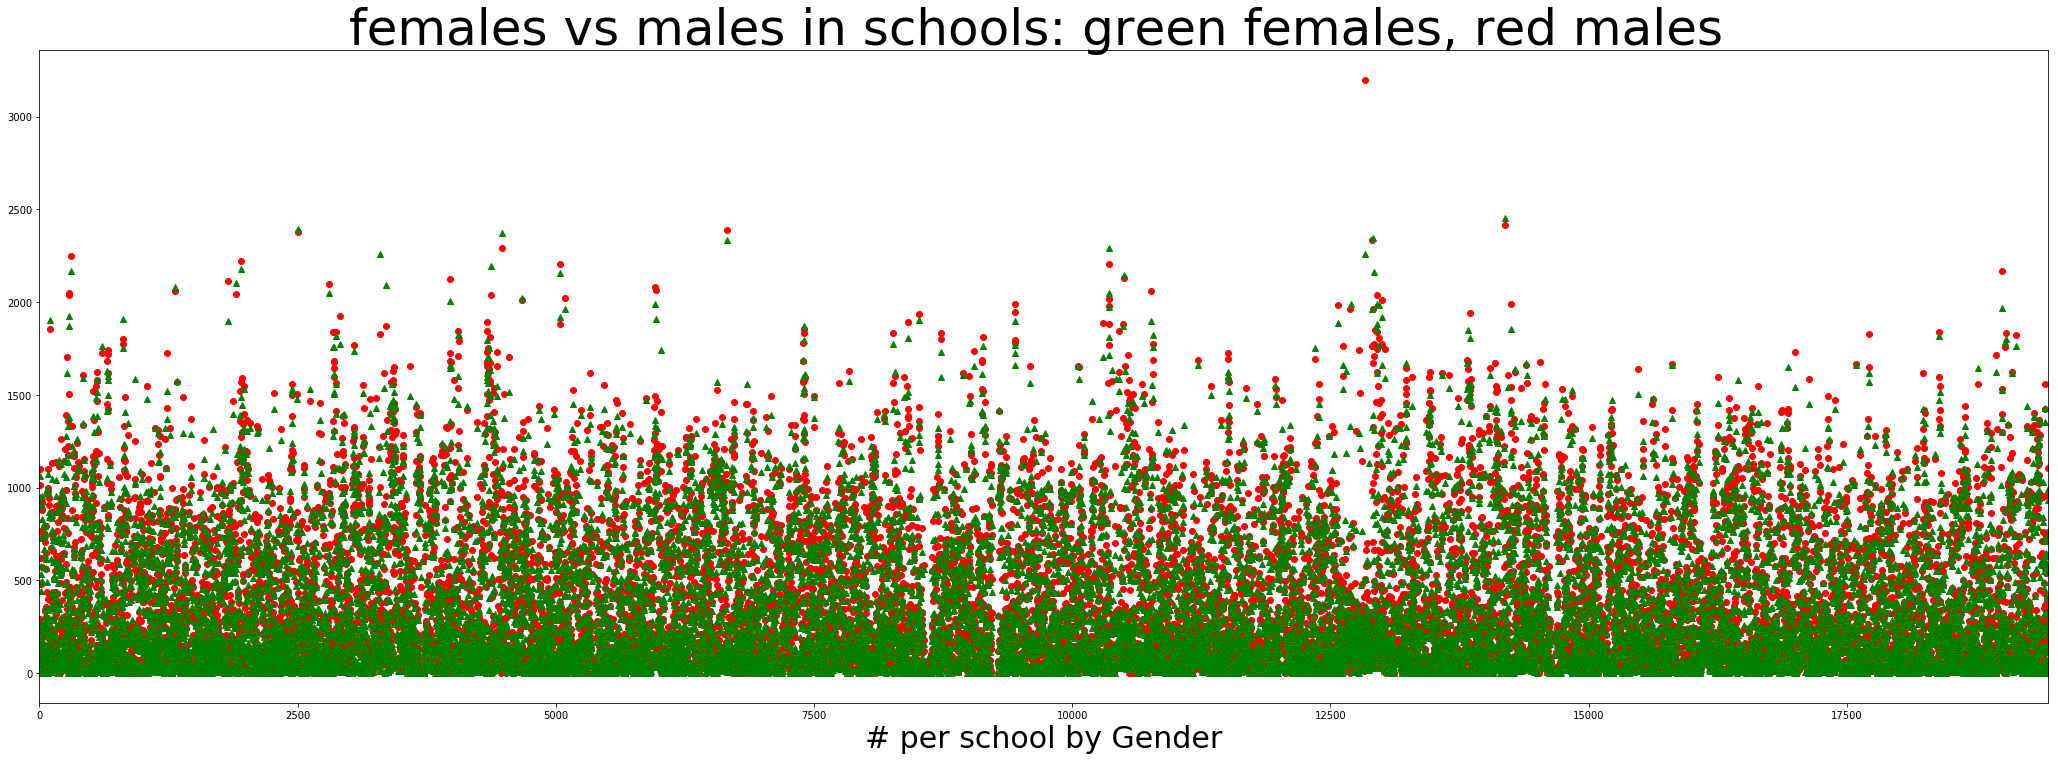

In [31]:
plt.figure(figsize=(36,12))
plt.xlim([1,19450])
plt.xlabel('# per school by Gender', size = 30)
plt.title('females vs males in schools: green females, red males ', size =50)
plt.plot( merge_sd.index ,merge_sd.m, 'ro',merge_sd.index,merge_sd.f,'g^')
plt.show()
#plt.plot(t, t, 'r--', t, t**2, 'bs', t)

this table diaplays the number of females and males in each school. 
green = females 
red = males

This is viz isn't doing a great job in showing what is the dieffrence in quantities between both sexes (there are MANY schools, the dots overlap each other etc). 

However it does look like overall red tend to get higher and green is more conentrated on the bottom, so it seems like most school have more males than females. This information is validated when looking at the desciptitives for both genders: 

the females mean is 


In [32]:
#merge_sd['index1'].describe()

#### 6. create a new column using both females and males 

In [33]:
#the share of females in schools 
merge_sd['g_interval'] = merge_sd['m'] / (merge_sd['f']+merge_sd['m'])

##### D. descirptives for the new interval column 

In [34]:
merge_sd['g_interval'].describe()

count    19289.000000
mean         0.524782
std          0.101221
min          0.000000
25%          0.494099
50%          0.514056
75%          0.538462
max          1.000000
Name: g_interval, dtype: float64

#### E. plot the ratio of females in schools: 0-1

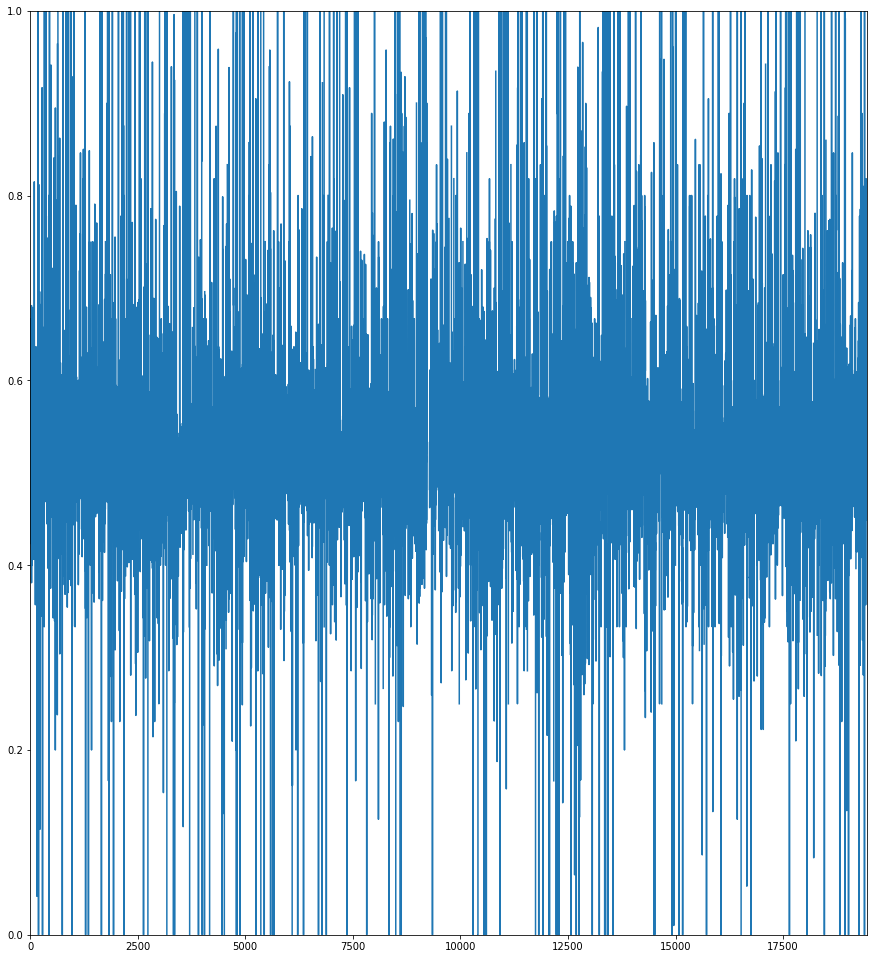

In [35]:
plt.figure(figsize=(15,17))
plt.xlim([1,19450])
plt.ylim([0,1])

plt.plot(merge_sd.g_interval)
#plt.axvline(y=.5, color = 'k')
